In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
idx_file = 0

In [3]:
if idx_file==0: title = 'longdress'
if idx_file==1: title = 'loot'
if idx_file==2: title = 'redandblack'
if idx_file==3: title = 'solider'

# G-PCC

In [4]:
csvdir = ['csvfiles/double_lossy/G-PCC/longdress_vox10_1300.csv', 
          'csvfiles/double_lossy/G-PCC/loot_vox10_1200.csv', 
          'csvfiles/double_lossy/G-PCC/redandblack_vox10_1550.csv', 
          'csvfiles/double_lossy/G-PCC/soldier_vox10_0690.csv'][idx_file]

In [5]:
gpcc = pd.read_csv(csvdir)

bpp = np.array(gpcc['bpp'])
pcqm = np.array(gpcc['pcqm'])

GPCC = [bpp, pcqm]

# V-PCC

In [6]:
csvdir = ['csvfiles/double_lossy/V-PCC/longdress_vox10_vpcc.csv', 
          'csvfiles/double_lossy/V-PCC/loot_vox10_vpcc.csv', 
          'csvfiles/double_lossy/V-PCC/redandblack_vox10_vpcc.csv', 
          'csvfiles/double_lossy/V-PCC/soldier_vox10_vpcc.csv'][idx_file]

In [7]:
vpcc = pd.read_csv(csvdir)

bpp = np.array(vpcc['bpp'])
pcqm = np.array(vpcc['pcqm'])

VPCC = [bpp, pcqm]

# Ours

In [8]:
csvdir = ['csvfiles/double_lossy/ours/longdress_vox10_1300.csv', 
          'csvfiles/double_lossy/ours/loot_vox10_1200.csv', 
          'csvfiles/double_lossy/ours/redandblack_vox10_1550.csv', 
          'csvfiles/double_lossy/ours/soldier_vox10_0690.csv'][idx_file]

In [9]:
ours = pd.read_csv(csvdir)

bpp = np.array(ours['bpp'])
pcqm = np.array(ours['pcqm'])

ours = [bpp, pcqm]

# plot

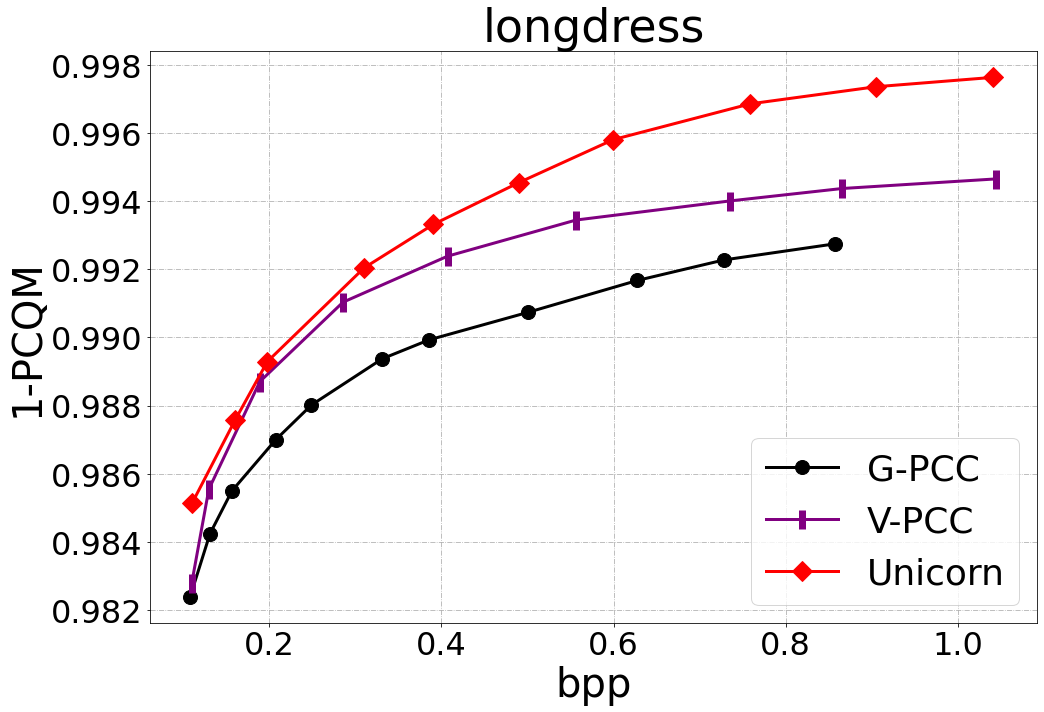

In [10]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
prefix = '  '
linestyle='solid'
linewidth=3
markersize=14
metric = 'PCQM'


plt.plot(GPCC[0], GPCC[1], label='G-PCC', 
         color='black', marker='o', linestyle=linestyle, linewidth=linewidth, markersize=markersize)

plt.plot(VPCC[0], VPCC[1], label='V-PCC', 
         color='purple', marker='|', linestyle=linestyle, linewidth=linewidth, markersize=markersize+5, markeredgewidth=7)


plt.plot(ours[0], ours[1], label='Unicorn', 
         color='red', marker='D', linestyle=linestyle, linewidth=linewidth, markersize=markersize)


ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)
plt.tick_params(labelsize=32)
plt.xlabel('bpp', fontdict={'size':40})
plt.ylabel('1-PCQM', fontdict={'size':40})

plt.title(title, fontdict={'size':46})

plt.grid(ls='-.')
plt.legend(loc='lower right', prop={'size':36})

fig.tight_layout()

os.makedirs('figs/double/', exist_ok=True)
fig.savefig( os.path.join('figs/double', title+'_'+metric+'.pdf'))
